In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

gmaps.configure(api_key=g_key)

In [3]:
# File to Load
file_to_load = "2010-2019_Crime.csv"

# Read Purchasing File and store into Pandas data frame
crime_df = pd.read_csv(file_to_load)
crime_df

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,Weapon,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,0,0,0,0,0,0,41.881557,-87.627759
1,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,2,0,0,0,0,0,41.880831,-87.629159
2,32,Central,Loop,2010,Jan,BATTERY,35,12,35,0,2,0,0,0,0,0,41.878982,-87.627872
3,32,Central,Loop,2010,Jan,BURGLARY,8,1,0,0,0,0,0,0,0,0,41.883088,-87.631038
4,32,Central,Loop,2010,Jan,CRIM SEXUAL ASSAULT,1,0,1,0,0,0,0,0,0,0,41.885742,-87.631499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152969,24,West Side,West Town,2019,Dec,OTHER OFFENSE,22,4,0,0,0,0,0,0,0,0,41.902077,-87.685152
152970,24,West Side,West Town,2019,Dec,ROBBERY,27,0,27,12,14,27,0,0,0,0,41.901194,-87.676253
152971,24,West Side,West Town,2019,Dec,SEX OFFENSE,4,0,0,0,0,0,0,0,0,4,41.903475,-87.683698
152972,24,West Side,West Town,2019,Dec,THEFT,248,10,0,0,0,0,0,0,0,0,41.902280,-87.672711


In [4]:
# Set path for file
comm_file = "Chicago_Communities.csv"

# Read Chicago Community File and store into Pandas data frame
comm_df = pd.read_csv(comm_file)
comm_df

,Community #,City Area,Community,Neighborhood
0,8,Central,Near North Side,Cabrini-Green
1,8,Central,Near North Side,The Gold Coast
2,8,Central,Near North Side,Goose Island
3,8,Central,Near North Side,Magnificent Mile
4,8,Central,Near North Side,Old Town
...,...,...,...,...
184,74,Far Southwest Side,Mount Greenwood,Mount Greenwood Heights
185,74,Far Southwest Side,Mount Greenwood,Talley's Corner
186,75,Far Southwest Side,Morgan Park,Beverly Woods
187,75,Far Southwest Side,Morgan Park,Kennedy Park


In [17]:
# # Input to draw modified Line Graph
# community = input("What part of Chicago do you want to look into? ")

In [12]:
area = comm_df.loc[comm_df["Neighborhood"] == neighborhood]['City Area']
area = area.values
area = area[0]
# type(area)
# area type originally = series so .values was used to pull an individual value from that series

community = comm_df.loc[comm_df["Neighborhood"]== neighborhood]['Community']
# type(area)
community = community.values
community = community[0]

print(f"{neighborhood} is in the {area} area, in {community}")

Kennedy Park is in the Far Southwest Side area, in the Morgan Park community


In [13]:
crime_type_df = crime_df.filter(['Year',
                                 'Community',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])
input_df = crime_type_df.loc[crime_type_df["Community"]== community]
input_df

# GroupBy Year
year_group = input_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# sexual_crimes

# # # Calculate Weponry Crimes
# ,# weapon_crimes = pd.DataFrame(year_group["Weapon"].sum())
# # # weapon_crimes

In [14]:
# Merge Crime Calculations
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, robbery_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, vandalism_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, fraud_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, drug_crimes, on='Year')
merge_table5

crime_type_totals = pd.merge(merge_table5, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
crime_type_totals

,Year,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,2010,694,84,90,324,118,330,24
1,2011,700,95,98,327,93,229,19
2,2012,578,91,93,312,117,213,11
3,2013,561,71,84,253,113,218,14
4,2014,477,50,56,204,71,178,18
5,2015,466,67,59,236,57,138,11
6,2016,501,85,50,252,58,65,12
7,2017,515,64,61,283,71,35,14
8,2018,504,56,27,238,82,48,25
9,2019,445,64,39,193,65,63,23


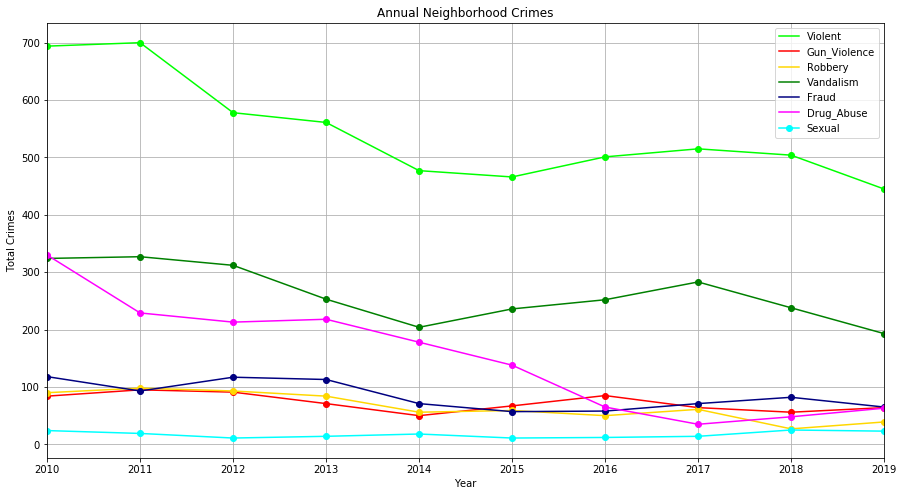

In [15]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Neighborhood Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('annual_crimes.png')

plt.show()

In [ ]:
# Annual Gun Violence: 
# Top 9 communities with over 3,400 Gun Violence Crimes 2010-2019

# Filter by Top 9 Communities
gun_violence_df = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]
# gun_violence_df

gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
# gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Minor Data Munging to Re-Format the Data Frames
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
gun_violence_df


In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('annual_gun_violence.png')
# plt.grid(axis='y')
plt.show()

In [ ]:
gun_violence_comm = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]

gun_violence_areas = gun_violence_comm.filter(['Area','Community'])
gun_violence_areas = gun_violence_areas.drop_duplicates()
gun_violence_areas

In [ ]:
# Violent Crimes vs # of Arrests
arrest_df = crime_df.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that = 0 under Violent
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Calculate No Arrests
arrest_df['No_Arrests'] = arrest_df['Violent'] - arrest_df['Arrests']
arrest_df

# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "Arrests", "No_Arrests"])
# v_crime_arrests

In [ ]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('v_crime_arrests.png')

plt.show()

In [ ]:
# https://stackoverflow.com/questions/49889398/plot-stacked-bar-chart-from-pandas-data-frame

# cumval=0
# fig = plt.figure(figsize=(12,8))
# for col in payout_df.columns[~payout_df.columns.isin(['payout'])]:
#     plt.bar(payout_df.payout, payout_df[col], bottom=cumval, label=col)
#     cumval = cumval+payout_df[col]

In [ ]:
# # Filter Focus Communities
# community_df = crime_df[(crime_df.Community == 'Rogers Park')|
#                         (crime_df.Community == 'South Chicago')|
#                         (crime_df.Community == 'Logan Square')|
#                         (crime_df.Community == 'Englewood')|
#                         (crime_df.Community == 'Humboldt Park')|
#                         (crime_df.Community == 'Loop')|
#                         (crime_df.Community == 'Morgan Park')|
#                         (crime_df.Community == 'Portage Park')|
#                         (crime_df.Community == 'Hyde Park')]
# # community_df

# # Focus Communities :"Loop","Rogers Park","South Chicago", "Morgan Park", "Logan Square", "Portage Park",
# # "Hyde Park", "Englewood", "Humboldt Park"


In [ ]:
# Store latitude and longitude in locations
locations = crime_df[["Lat", "Lng"]]

In [ ]:
# Calculate areas with the highest types of crimes

area_crimes_df = crime_df.filter(['Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Weapon',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual',
                                 'Lat',
                                 'Lng'])
area_crimes_df

# GroupBy Area
area_group = area_crimes_df.groupby(['Area'])

# Calculate Violent Crimes
v_crimes = pd.DataFrame(area_group["Violent"].sum())
v_crimes
# Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(area_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(area_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(area_group["Vandalism"].sum())
# vandalism_crimes
# Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(area_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(area_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sex_crimes = pd.DataFrame(area_group["Sexual"].sum())
# sexual_crimes
latitude = pd.DataFrame(area_group["Lat"].mean())
latitude
longitude = pd.DataFrame(area_group["Lng"].mean())
# longitude

area_crimes_df


In [ ]:
# Merge Crime Calculations
table1 = pd.merge(v_crimes, gun_crimes, on='Area')
table1

table2 = pd.merge(table1, robbery_crimes, on='Area')
table2

table3 = pd.merge(table2, vandalism_crimes, on='Area')
table3

table4 = pd.merge(table3, fraud_crimes, on='Area')
table4

table5 = pd.merge(table4, drug_crimes, on='Area')
table5

table6 = pd.merge(table5, sex_crimes, on='Area')
table6

table7 = pd.merge(table6, latitude, on='Area')
table7

crimes_per_area = pd.merge(table7, longitude, on='Area')
crimes_per_area= crimes_per_area.reset_index()
crimes_per_area

 
# area_crime_totals = pd.merge(table_7, longitude, on='Area')
# area_crime_totals = area_crime_totals.reset_index()
# area_crime_totals

In [ ]:
crimes_per_area.loc[crimes_per_area['Area'].idxmax()]

In [ ]:
type(crimes_per_area)

In [ ]:
# Fill NaN values and convert to float
crime_rate = crime_df["Crimes"].astype(float)

In [ ]:
df_test = area_crime_totals.set_index('Area').T.stack()
df_test


In [ ]:
# 
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=crime_rate, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig